In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
import os
os.chdir('/Users/ethanpickering/Downloads/Cam1')


(1080, 1920)

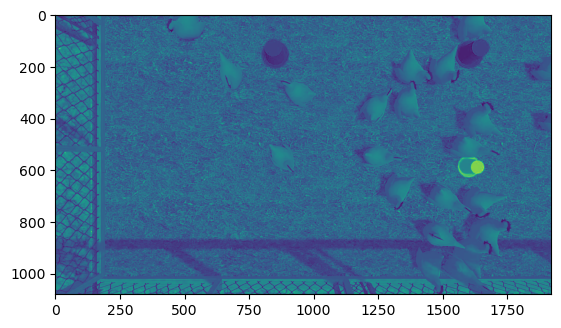

In [32]:
import cv2
import numpy as np
# Load an image
image = cv2.imread('cam1_0004.jpg')

r1 = image[:,:,0] # get blue channel
g1 = image[:,:,1] # get green channel
b1 = image[:,:,2] # get red channel

plt.imshow(r1)
np.shape(r1)

(60, 60)

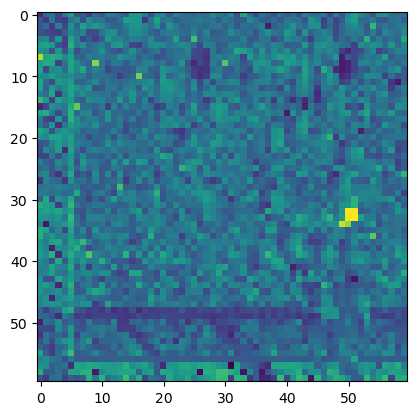

In [111]:
# Load an image
image = cv2.imread('cam1_0004.jpg')

r1 = image[:,:,0] # get blue channel
g1 = image[:,:,1] # get green channel
b1 = image[:,:,2] # get red channel

plt.imshow(r1)
np.shape(r1)
ds_x = 32
ds_y = 18
r1_d = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
plt.imshow(r1_d)
np.shape(r1_d)

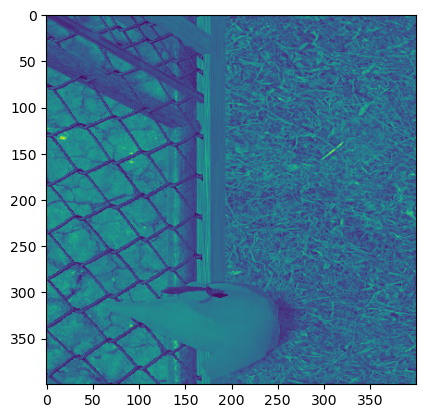

In [55]:
# Load in all Images
import glob
import cv2 as cv

path = glob.glob("*.jpg")
cv_img = []
for img in path:
    n = cv2.imread(img)
    r1 = n[:,:,0] # get blue channel
    cv_img.append(r1)
    
plt.imshow(cv_img[1][0:400, 0:400])

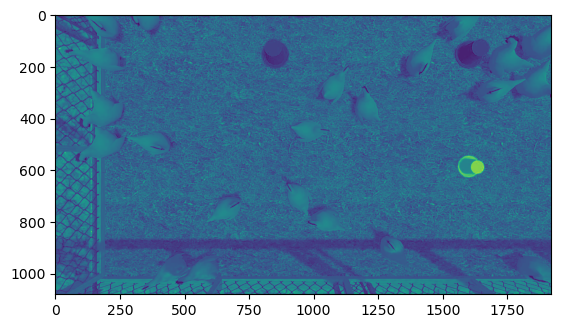

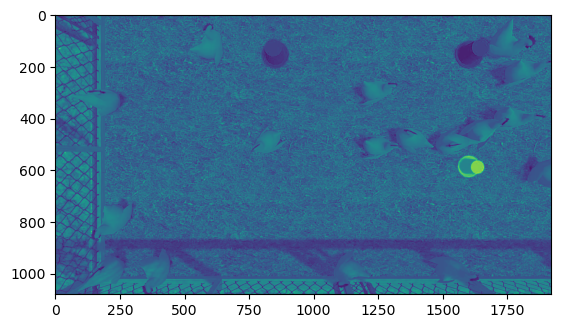

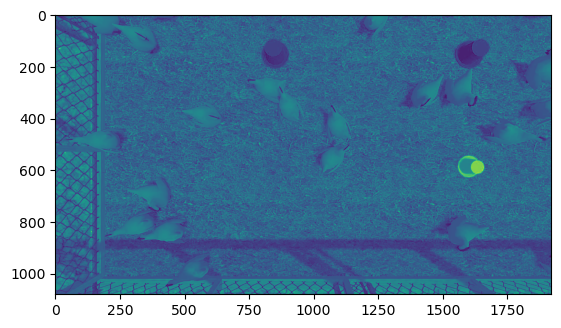

In [54]:
plt.imshow(cv_img[0])
plt.show()
plt.imshow(cv_img[1])
plt.show()
plt.imshow(cv_img[9])
plt.show()

In [4]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import cv2 as cv
import torchvision.transforms as transforms


# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class ChickenDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

        
        # Read the image
        image = cv2.imread('iceland.jpg')

        # Convert BGR image to RGB image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Define a transform to convert
        # the image to torch tensor
        transform = transforms.Compose([
            transforms.ToTensor()
        ])

        # Convert the image to Torch tensor
        tensor = transform(image)

        # print the converted image tensor
        print(tensor)
        
        
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [5]:
class ChickenDataset(Dataset):

    def __init__(self, x, y):
        self.n_samples = y.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = x # size [n_samples, n_features (pixels x pixels)]
        self.y_data = y # size [n_samples, 1]        
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [7]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import cv2 as cv
import torchvision.transforms as transforms

        # Convert BGR image to RGB image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Define a transform to convert
        # the image to torch tensor
        transform = transforms.Compose([
            transforms.ToTensor()
        ])

        # Convert the image to Torch tensor
        tensor = transform(image)

        # print the converted image tensor
        print(tensor)

IndentationError: unexpected indent (616240543.py, line 11)

In [37]:
path = glob.glob("*.jpg")
len(path)

949

torch.Size([949, 1, 216, 384])
torch.Size([949, 1, 216, 384])


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

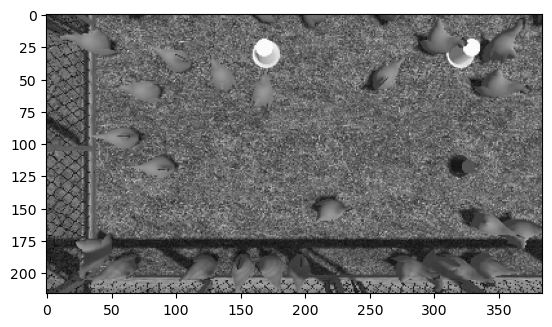

In [38]:
# Load in all Images
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import cv2
import torchvision.transforms as transforms

        # Define a transform to convert
        # the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

#ds_x = 60
#ds_y = 40

ds_x = 5
ds_y = 5

path = glob.glob("*.jpg")

#t_img = torch.empty((10, 1, 1080, 1920))
t_img = torch.empty((949, 1, 216, 384))

#t_img = torch.empty((10, 1, 27, 32))
#t_img = torch.empty((10, 1, 60, 60))
y_img = torch.empty((949, 1))
j = 0
for img in path:
    n = cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    r1 = n[:,:,0] # get 1 channel
    r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
    t1 = transform(r1)
    t_img[j,:,:,:] = t1
    y_img[j,:] = 1
    j = j+1
    #n x 1 x px x py
    
plt.imshow(t_img[2,0,:,:])
print(t_img.shape)
print(t_img.shape)
y_img

tensor([[[0.1059, 0.1098, 0.1804,  ..., 0.3608, 0.4667, 0.3804],
         [0.3020, 0.2275, 0.1333,  ..., 0.4745, 0.3843, 0.3176],
         [0.2431, 0.3020, 0.3098,  ..., 0.6196, 0.5098, 0.3020],
         ...,
         [0.2000, 0.0706, 0.1333,  ..., 0.5373, 0.5412, 0.4784],
         [0.4549, 0.1137, 0.2314,  ..., 0.5412, 0.5216, 0.5255],
         [0.2824, 0.2314, 0.2784,  ..., 0.0980, 0.2745, 0.4275]]]) tensor([1.])


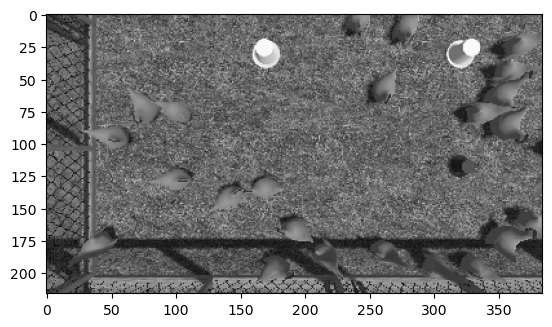

In [39]:
dataset = ChickenDataset(t_img, y_img)
# get first sample and unpack
first_data = dataset[8]
features, labels = first_data
print(features, labels)
plt.imshow(features[0,:,:])

torch.Size([1, 1080, 1920])
tensor(0.) tensor(1.)


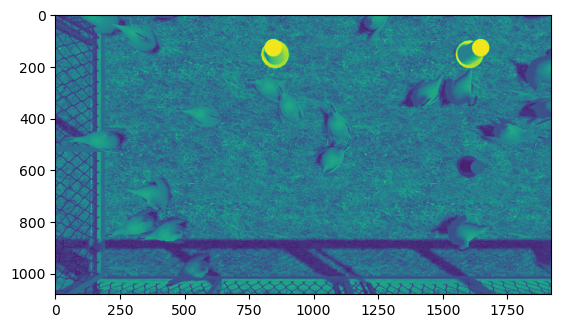

In [67]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import cv2 as cv
import torchvision.transforms as transforms

        # Define a transform to convert
        # the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

path = glob.glob("cam_0004.jpg")
n = cv2.imread(img)
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
t1 = transform(r1)    
    #n x 1 x px x py
    
plt.imshow(t1[0,:,:])

print(t1.shape)

print(torch.min(t1), torch.max(t1))

In [40]:
# Ok, now we have the dataset set up. Lets see if we can recreate the training
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=20,
                                          shuffle=True)

In [81]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 30, 30 (60, 60)
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 15, 15 (14, 16)
            nn.ReLU(),
            nn.Conv2d(32, 64, 4) # -> N, 64, 1, 1
        )
        
        # N , 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [84]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 30, 30 (60, 60)
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 15, 15 (14, 16)
            nn.ReLU(),
            nn.Conv2d(32, 64, 4) # -> N, 64, 1, 1
        )
        
        # N , 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [82]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [83]:
import time
# Point to training loop video
num_epochs = 1
outputs = []
for epoch in range(num_epochs):
    start = time.perf_counter()
    for (img, _) in data_loader:
        #img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    end = time.perf_counter()
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}, Time:{end-start:.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0114, Time:19.1240


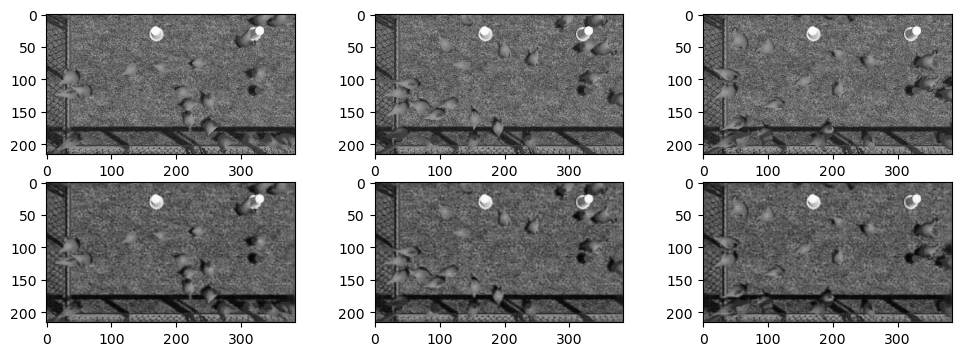

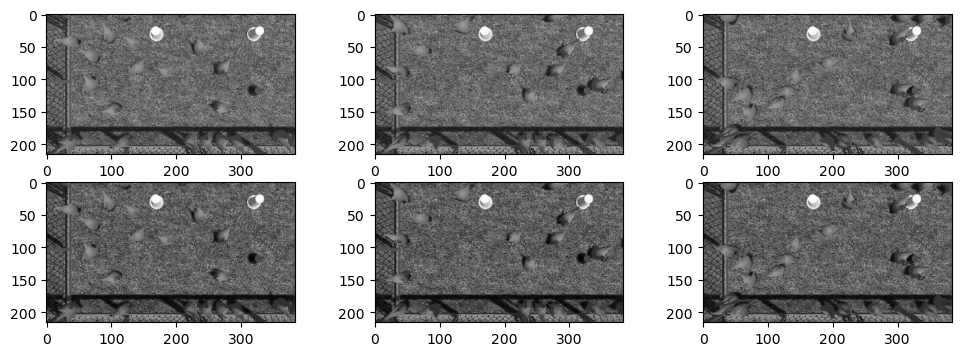

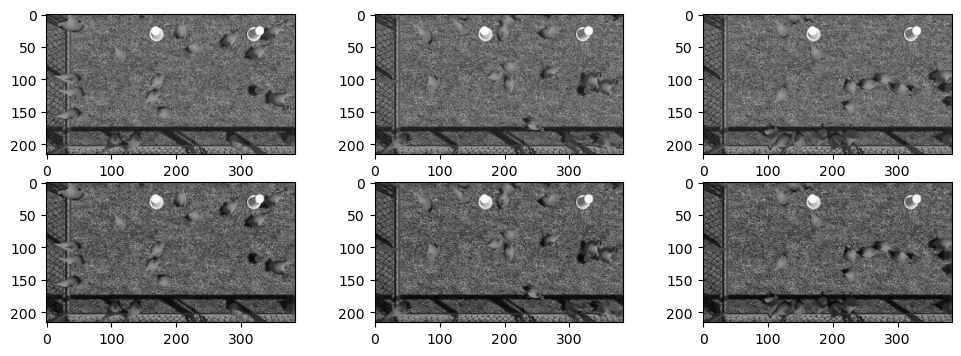

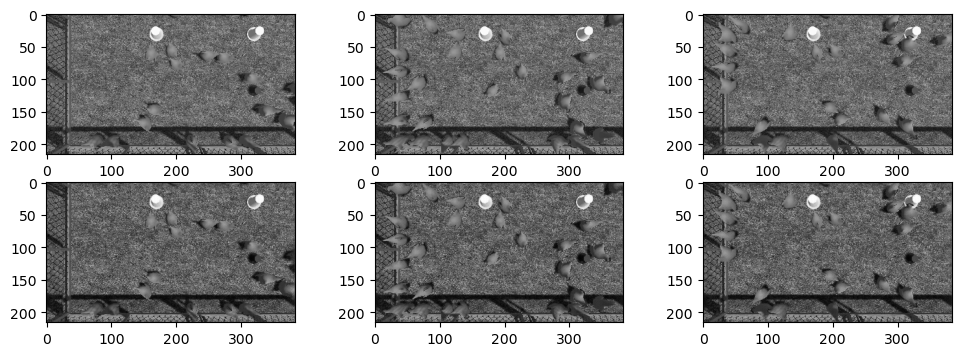

In [47]:
for k in range(0, num_epochs, 50):
    plt.figure(figsize=(12, 4))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 3: break
        plt.subplot(2, 3, i+1)
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 3: break
        plt.subplot(2, 3, 3+i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

torch.Size([999, 1, 216, 384])
torch.Size([999, 1, 216, 384])


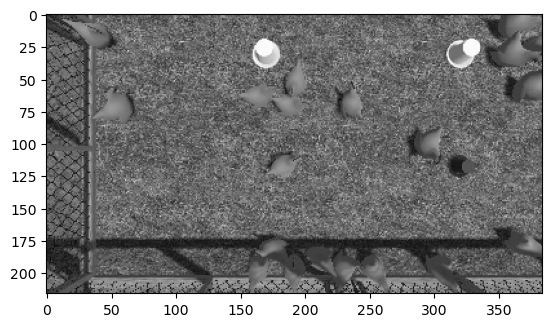

In [50]:
# Create the test set for validation
ds_x = 5
ds_y = 5

path = glob.glob("*.jpg")

#t_img = torch.empty((10, 1, 1080, 1920))
t_img = torch.empty((999, 1, 216, 384))

#t_img = torch.empty((10, 1, 27, 32))
#t_img = torch.empty((10, 1, 60, 60))
y_img = torch.empty((999, 1))
j = 0
for img in path:
    n = cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    r1 = n[:,:,0] # get 1 channel
    r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
    t1 = transform(r1)
    t_img[j,:,:,:] = t1
    y_img[j,:] = 1
    j = j+1
    #n x 1 x px x py
    
plt.imshow(t_img[2,0,:,:])
print(t_img.shape)
print(t_img.shape)

#t_img_test = torch.empty((50, 1, 216, 384))
#y_img_test = torch.empty((50, 1))

t_img_test = t_img[949:998,:,:,:]
y_img_test = y_img[949:998,:]

plt.imshow(t_img_test[2,0,:,:])

tensor([[[0.1059, 0.1098, 0.1804,  ..., 0.3608, 0.4667, 0.3804],
         [0.3020, 0.2275, 0.1333,  ..., 0.4745, 0.3843, 0.3176],
         [0.2431, 0.3020, 0.3098,  ..., 0.6196, 0.5098, 0.3020],
         ...,
         [0.2000, 0.0706, 0.1333,  ..., 0.5373, 0.5412, 0.4784],
         [0.4549, 0.1137, 0.2314,  ..., 0.5412, 0.5216, 0.5255],
         [0.2824, 0.2314, 0.2784,  ..., 0.0980, 0.2745, 0.4275]]]) tensor([1.])


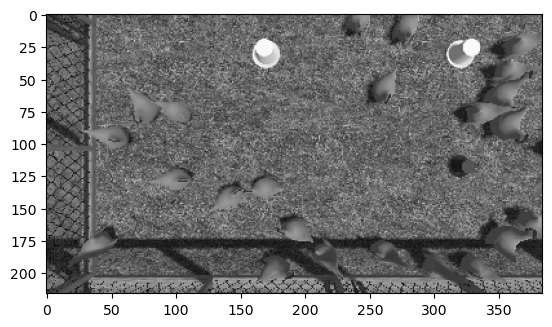

In [52]:
dataset_test = ChickenDataset(t_img_test, y_img_test)
# get first sample and unpack
first_data = dataset[8]
features, labels = first_data
print(features, labels)
plt.imshow(features[0,:,:])

# Ok, now we have the dataset set up. Lets see if we can recreate the training
data_loader_test = torch.utils.data.DataLoader(dataset=dataset_test,
                                          batch_size=10,
                                          shuffle=True)

In [53]:
for (img_test, _) in data_loader_test:
    recon_test = model(img_test)
    loss_test = criterion(recon_test, img_test)

tensor([[[0.3550, 0.3033, 0.3568,  ..., 0.3913, 0.3941, 0.3986],
         [0.4253, 0.3656, 0.3572,  ..., 0.3884, 0.3940, 0.3953],
         [0.4018, 0.3910, 0.3851,  ..., 0.3917, 0.3910, 0.3960],
         ...,
         [0.3880, 0.3840, 0.3955,  ..., 0.3558, 0.3384, 0.3527],
         [0.3894, 0.3871, 0.3862,  ..., 0.3955, 0.3849, 0.3901],
         [0.4034, 0.3965, 0.3943,  ..., 0.3708, 0.3872, 0.4016]]],
       grad_fn=<SigmoidBackward0>)

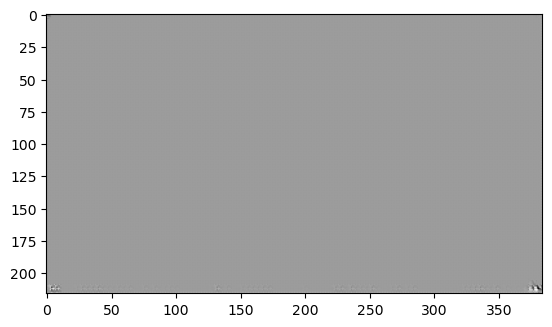

In [70]:
hopefully = model(t_img_test[2,:,:,:])
hopefully.shape
plt.imshow(hopefully[0,:,:].detach().numpy())
hopefully

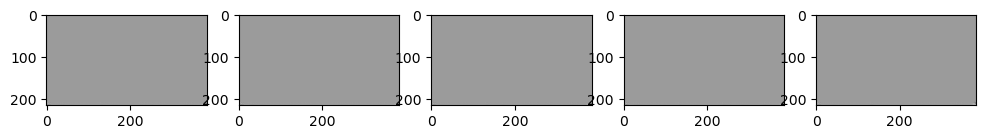

In [63]:
plt.figure(figsize=(12, 4))
plt.gray()

#    recon = outputs[k][2].detach().numpy()
recon_test_d = recon_test.detach().numpy()
    
for i, item in enumerate(recon_test_d):
        if i >= 5: break
        plt.subplot(1, 5, i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])